In [1]:
pip install pandas matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter

In [3]:
data = pd.read_csv('TestReviews.csv.zip')

In [4]:
five_star_reviews = data[data['class'] == 1]['review']

In [5]:
def preprocess(text):
    text = re.sub(r'[^\w\s]', '', text)  
    text = text.lower() 
    words = text.split()
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

In [6]:
processed_reviews = five_star_reviews.apply(preprocess)
all_words = [word for review in processed_reviews for word in review]

In [7]:
word_freq = Counter(all_words)

In [8]:
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
word_freq_df.to_csv('Word_Frequencies.csv', index=False)

In [9]:
combined_text = ' '.join(all_words)

In [14]:
wordcloud = WordCloud(
    width=800, height=400, background_color='white', colormap='viridis', max_words=100
).generate(combined_text)

In [15]:
wordcloud.to_file('WordCloud.png')

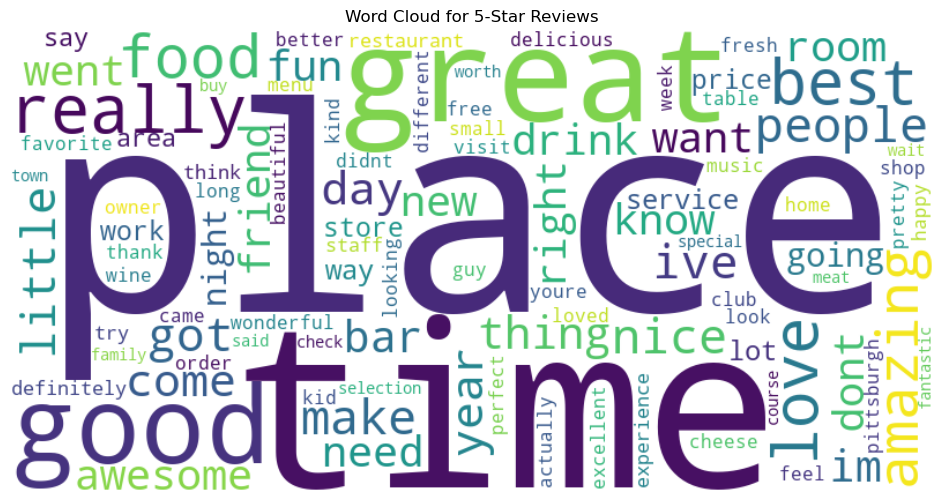

In [16]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for 5-Star Reviews")
plt.show()

In [17]:
print("Top 10 Words:")
print(word_freq_df.head(10))

Top 10 Words:
       Word  Frequency
34    place       1772
8     great       1669
35     like       1128
129    time       1082
22     good       1038
91     just        985
19   really        813
20     love        766
251    best        739
250    food        727
